In [2]:
## All purpose
import pandas as pd 
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords # pip3 install gensim==3.6.0
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

     |████████████████████████████████| 125 kB 12.1 MB/s 


In [3]:
## Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
def processString(txt): # https://www.delftstack.com/zh-tw/howto/python/python-replace-multiple-characters/
    specialChars = "+-!#$%^&*()/|" 
    for specialChar in specialChars:
        txt = txt.replace(specialChar, '')
        txt = txt.replace('\t', '')
        txt = txt.replace('\n', '')
        #print(txt)
    return(txt)

In [6]:
## Importing CSV file
df = pd.read_csv("/content/drive/MyDrive/BDSE23 第三組共享區/觀光/Dataset/europe luxury Hotel.csv")
df['Total_Rating']=round(df['Reviewer_Score']/2,0).astype("int") # 不可以為0
df['Total_Rating']=df['Total_Rating'].replace('0','1',) # 先改1
df['Total_Rating']=df['Total_Rating'].astype("int")
df1=df[df["Positive_Review"]!= 'NaN'].astype("str") # 看起來這行沒用
df1["Positive_Review"]=processString(df1["Positive_Review"])
df1=df1[df1["Positive_Review"]!= None]

df2=df[df["Negative_Review"]!= 'NaN'].astype("str")
df2["Negative_Review"]=processString(df2["Negative_Review"])
df2=df2[df2["Negative_Review"]!= None]

df_1=pd.concat([df1["Positive_Review"],df1['Total_Rating']],axis=1)
df_2=pd.concat([df2["Negative_Review"],df2['Total_Rating']],axis=1)
df_1.columns=["Review","Total_Rating"]
df_2.columns=["Review","Total_Rating"]
df=pd.concat([df_1,df_2],axis=0, ignore_index=True).dropna(axis = 0, how ='any') 

## Applying Compund score
polarity_scores = df["Review"].astype("str").apply(compound_score)
df["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)

In [7]:
df=df.reset_index(drop=True)

In [8]:
ID=[]
for i in range(len(df)):
  ID.append(i)

In [9]:
len(ID)

1031476

In [10]:
df["Reviewer_Id"]=ID
df['Total_Rating']=df['Total_Rating'].astype('int')

In [11]:
df = df.drop("Reviewer_Id",axis=1)
df.insert(0,"Reviewer_Id",ID)

In [12]:
df.head()

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment
0,0,Only the park outside of the hotel was beauti...,1,0.5994,Positive
1,1,No real complaints the hotel was great great ...,4,0.9603,Positive
2,2,Location was good and staff were ok It is cut...,4,0.8720,Positive
3,3,Great location in nice surroundings the bar a...,2,0.9260,Positive
4,4,Amazing location and building Romantic setting,3,0.7579,Positive


In [13]:
df=pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031476 entries, 0 to 1031475
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Reviewer_Id      1031476 non-null  int64  
 1   Review           1031476 non-null  object 
 2   Total_Rating     1031476 non-null  int64  
 3   Sentiment_Score  1031476 non-null  float64
 4   Sentiment        1031476 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.3+ MB


In [15]:
df.head()

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment
0,0,Only the park outside of the hotel was beauti...,1,0.5994,Positive
1,1,No real complaints the hotel was great great ...,4,0.9603,Positive
2,2,Location was good and staff were ok It is cut...,4,0.8720,Positive
3,3,Great location in nice surroundings the bar a...,2,0.9260,Positive
4,4,Amazing location and building Romantic setting,3,0.7579,Positive


In [16]:
df[df["Review"]==""]

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment


In [17]:
df[df["Total_Rating"]==0]

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment


In [19]:
df=df[df["Review"]!=""]
df=df[df["Review"]!="nan"]

In [20]:
df_c=df.drop(["Sentiment_Score","Sentiment"],axis=1)

In [21]:
print(len(df))
print(len(df1))
print(len(df_1))
print(len(df2))
print(len(df_2))

1031476
515738
515738
515738
515738


In [22]:
df.isna().sum()

Reviewer_Id        0
Review             0
Total_Rating       0
Sentiment_Score    0
Sentiment          0
dtype: int64

In [23]:
## Saving preprocessed file 
df.to_csv("luxury_Hotel-rating-sentiments_3.csv",index=False)
df_c.to_csv("luxury_Hotel-rating-data_c.csv",index=False)
df.Sentiment.value_counts()

Neutral     597185
Positive    379180
Negative     55111
Name: Sentiment, dtype: int64

In [24]:
# Importing the Datafiniti_Hotel_Reviews Dataset
#data=pd.read_csv('luxury_Hotel-rating-sentiments_3.csv')
data=df
# Having a look at the data
data.head()

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment
0,0,Only the park outside of the hotel was beauti...,1,0.5994,Positive
1,1,No real complaints the hotel was great great ...,4,0.9603,Positive
2,2,Location was good and staff were ok It is cut...,4,0.8720,Positive
3,3,Great location in nice surroundings the bar a...,2,0.9260,Positive
4,4,Amazing location and building Romantic setting,3,0.7579,Positive


In [25]:
data.isna().sum()

Reviewer_Id        0
Review             0
Total_Rating       0
Sentiment_Score    0
Sentiment          0
dtype: int64

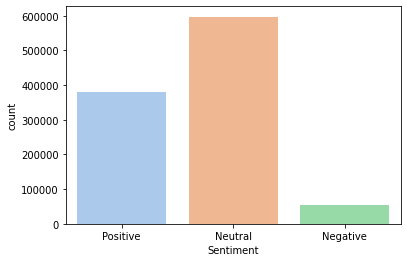

In [26]:
sns.countplot(data=data,x="Sentiment",palette="pastel");

In [27]:
# Preparing data for visualization 
Viz_1 = data[['Total_Rating','Sentiment']].value_counts().rename_axis(['Total_Rating','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph 
fig = px.bar(x=Viz_1['Total_Rating'], y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

In [28]:
#Viz2 Data preparation 
Viz_2 = data['Total_Rating'].value_counts().rename_axis(['Total_Rating']).reset_index(name='counts')
    
# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2['Total_Rating'], title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

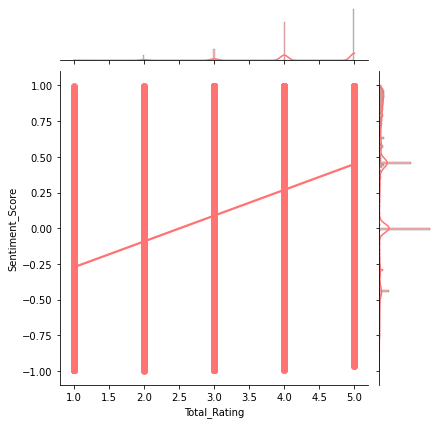

In [29]:
# Jointplot on the basis of Rating and Sentiment Score of the data
jp = sns.jointplot(data=data,x='Total_Rating',y='Sentiment_Score',kind="reg",color='#ff7373')
# jp.fig.suptitle('Jointplot on the basis of Rating and Sentiment Score of the data',fontsize=20);

In [30]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=data['Total_Rating'][data['Total_Rating'] == rating],
                            y=data['Sentiment_Score'][data['Total_Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,
        
    )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
data.tail()

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment
1031471,1031471,no trolly or staff to help you take the lugga...,4,0.1280,Neutral
1031472,1031472,The hotel looks like 3 but surely not 4,3,0.6808,Positive
1031473,1031473,The ac was useless It was a hot week in vienn...,1,-0.4215,Neutral
1031474,1031474,No Negative,4,0.4585,Neutral
1031475,1031475,I was in 3rd floor It didn t work Free Wife,4,0.5106,Positive


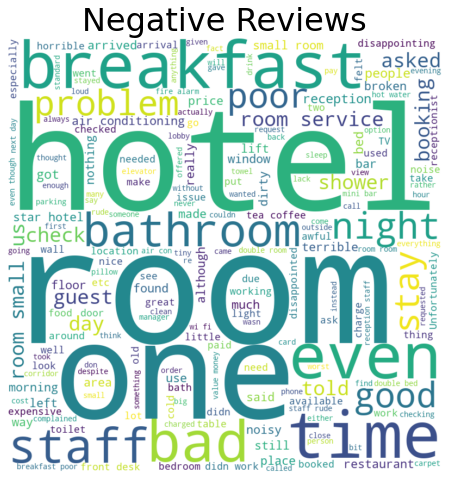

In [32]:
text1 =''
Sentiment='Negative' # In original article, he used deepnote tool to change datatype.
for i in data[data['Sentiment']==str(Sentiment)]['Review'].values: 
    text1+=i + ' '
    
wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True,)
wc.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(Sentiment+' Reviews',fontsize=32);

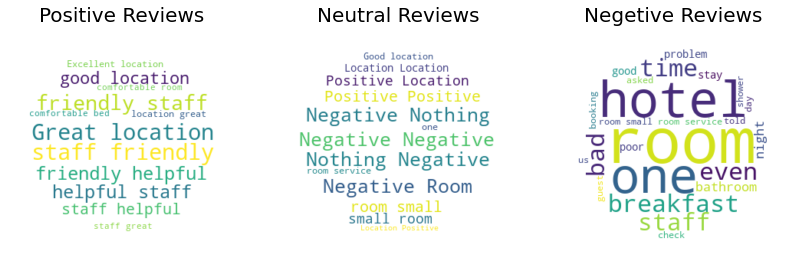

In [33]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in data[data['Sentiment']=='Positive']['Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in data[data['Sentiment']=='Neutral']['Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in data[data['Sentiment']=='Negative']['Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negetive Reviews',fontsize=20);

plt.show()

In [34]:
input_1="We were together with some friends at the Anewandter Hof. We took all 4 apartments, which enabled us privacy & piece. Apartments are fully equiped. Free use of sauna & whirlpool in the hotel was a bonus. Every morning there is a fresh bread waiting for us at the door. Great atmosphere, hospitable family Mairl and affordable price."

In [35]:
keywords(input_1).split("\n") # Need to modify.

['piece', 'bread', 'free', 'equiped']

In [36]:
data["keywords"] = data["Review"].apply(keywords)
data["keywords"] = data["keywords"].astype("str").str.replace('\n',',',) 

In [37]:
data[data["keywords"]==""] # 找不到關鍵字的資料

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment,keywords
0,0,Only the park outside of the hotel was beauti...,1,0.5994,Positive,
2,2,Location was good and staff were ok It is cut...,4,0.8720,Positive,
6,6,The room is spacious and bright The hotel is ...,2,0.7783,Positive,
8,8,No Positive,3,-0.4449,Neutral,
11,11,Style location rooms,3,0.0000,Neutral,
...,...,...,...,...,...,...
1031471,1031471,no trolly or staff to help you take the lugga...,4,0.1280,Neutral,
1031472,1031472,The hotel looks like 3 but surely not 4,3,0.6808,Positive,
1031473,1031473,The ac was useless It was a hot week in vienn...,1,-0.4215,Neutral,
1031474,1031474,No Negative,4,0.4585,Neutral,


In [38]:
words = []
for x in data.keywords.values:
    x=x.split(",")
    for i in x:
        words.append(i)

In [39]:
from collections import Counter
word_counter = Counter(words)

In [40]:
word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])

In [41]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:19]
word_df.head(10)

,keyword,count
0,,661371
46,room,25644
33,staff,16600
12,location,15424
14,good,14681
10,great,14394
32,hotel,13932
63,breakfast,10281
7,rooms,8397
67,nice,7312


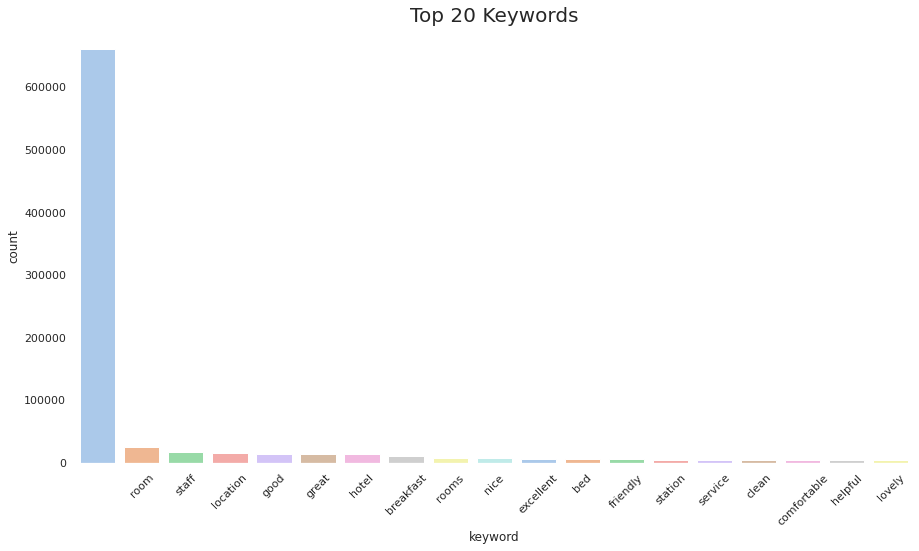

In [42]:
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=top_20,x="keyword",y="count",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);

嘗試拿掉無關鍵字的畫圖

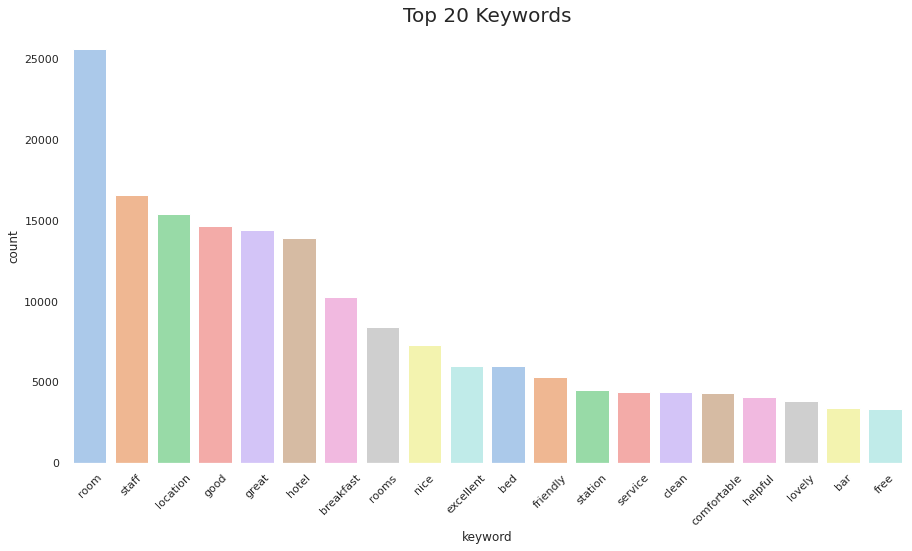

In [43]:
top_20 = word_df[1:21]
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=top_20,x="keyword",y="count",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);

In [44]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

拿掉相對無意義的常出現詞

In [46]:
top5 = ["hotel","room","rooms","hotels"]
for x in top5:
    data["Review"] = data["Review"].astype(str).str.replace(x,"")

In [47]:
data.head(2)

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment,keywords
0,0,Only the park outside of the was beautiful,1,0.5994,Positive,
1,1,No real complaints the was great great locat...,4,0.9603,Positive,"payments,payment,sandwich,quality,bit,confusin..."


In [48]:
data2=data.copy()
      
def removing_stop_words(txt):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(txt) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
     
    return filtered_sentence
    
data2["Review"] = data2["Review"].apply(removing_stop_words)

In [49]:
# Making a function to lemmatize 
lemmatizer = WordNetLemmatizer() 
def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n')
        x=lemmatizer.lemmatize(j,pos='v')
        x=lemmatizer.lemmatize(j,pos='a')
        x=lemmatizer.lemmatize(j,pos='r')
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


data2["Review"] = data2["Review"].apply(lemmatize)

In [50]:
data2["Review"] = data2["Review"].apply(lambda x:" ".join(token for token in x))

In [51]:
data2.head(2)

,Reviewer_Id,Review,Total_Rating,Sentiment_Score,Sentiment,keywords
0,0,Only park outside beautiful,1,0.5994,Positive,
1,1,No real complaint great great location surroun...,4,0.9603,Positive,"payments,payment,sandwich,quality,bit,confusin..."


In [52]:
X = data2["Review"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

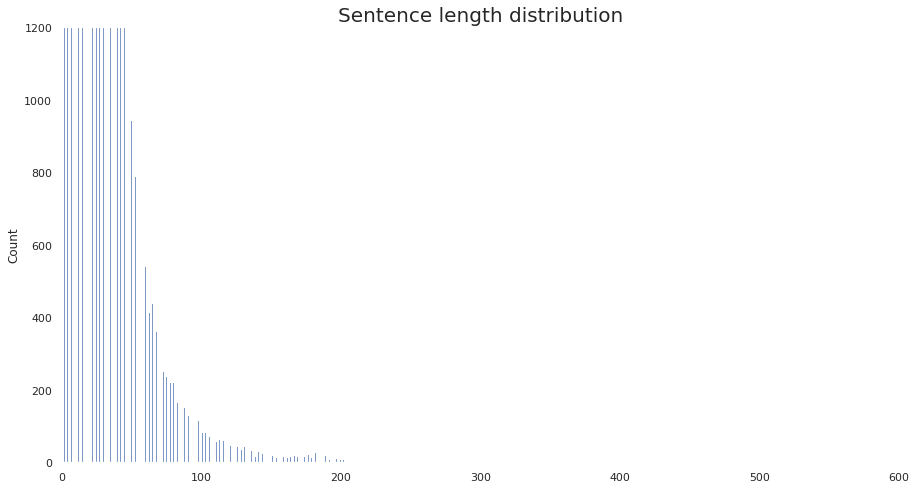

In [53]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

In [54]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 77785
max length of sentence: 371


In [55]:
# Padding the reviews [Pads sequences to the same length.]
X = pad_sequences(X, padding='post', maxlen=600)

In [56]:
labels = ['1', '2', '3', '4', '5']
          
y = data['Total_Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

In [57]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [58]:
X_train

array([[   5, 1187,  113, ...,    0,    0,    0],
       [  15,   10,    7, ...,    0,    0,    0],
       [   6,   28,  319, ...,    0,    0,    0],
       ...,
       [   9,    3,  807, ...,    0,    0,    0],
       [   6,    5,  132, ...,    0,    0,    0],
       [ 442,   15,  857, ...,    0,    0,    0]], dtype=int32)

In [59]:
embedding_dim =16
EPOCHS = 5
BATCH_SIZE = 125
units = 76
val_split = 0.12

In [60]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

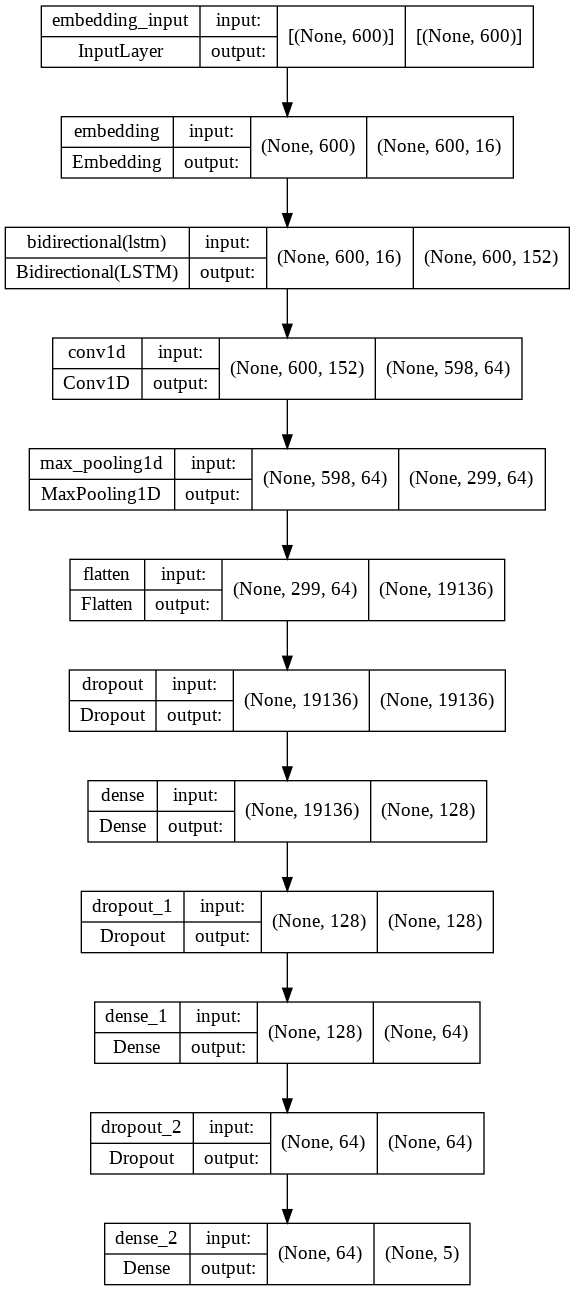

In [61]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) # You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [62]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

In [63]:
history = model.fit(X_train, y_train, epochs=int(EPOCHS), validation_split=float(val_split), batch_size=int(BATCH_SIZE), verbose=2)

Epoch 1/5
6536/6536 - 1405s - loss: 0.9711 - accuracy: 0.5695 - val_loss: 0.9417 - val_accuracy: 0.5793 - 1405s/epoch - 215ms/step
Epoch 2/5
6536/6536 - 1377s - loss: 0.9329 - accuracy: 0.5869 - val_loss: 0.9375 - val_accuracy: 0.5840 - 1377s/epoch - 211ms/step
Epoch 3/5
6536/6536 - 1376s - loss: 0.9157 - accuracy: 0.5964 - val_loss: 0.9319 - val_accuracy: 0.5859 - 1376s/epoch - 210ms/step
Epoch 4/5
6536/6536 - 1388s - loss: 0.9015 - accuracy: 0.6039 - val_loss: 0.9315 - val_accuracy: 0.5879 - 1388s/epoch - 212ms/step
Epoch 5/5
6536/6536 - 1378s - loss: 0.8873 - accuracy: 0.6117 - val_loss: 0.9397 - val_accuracy: 0.5838 - 1378s/epoch - 211ms/step


In [64]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

array([4, 4, 3, ..., 4, 3, 4])

In [65]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(pred_final, y_test)*100),2))

Accuracy: 58%


In [66]:
from sklearn.metrics import mean_squared_error
print("Root mean square error: {}".format(round(np.sqrt(mean_squared_error(pred_final,y_test)),3)))

Root mean square error: 0.822


In [67]:
model.save("Ds_BiLSTM_3.h5")

In [68]:
new_model = tf.keras.models.load_model('Ds_BiLSTM_3.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 16)           1244560   
                                                                 
 bidirectional (Bidirectiona  (None, 600, 152)         56544     
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 598, 64)           29248     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 299, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 19136)             0         
                                                                 
 dropout (Dropout)           (None, 19136)             0